In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('PWV_processed.csv') #change path
data.head(n=15)

,_id,case_no,status_dttm,status,code,value,description,violation_stno,violation_street,violation_city,violation_zip,ward,contact_addr1,sam_id,latitude,longitude
0,1,CE825063,2025-03-28 13:11:00,Open,3,100.0,overfilling of barrel/dumpster,3589,Washington,Jamaica Plain,2130.0,11.0,100 GRANDVIEW RD STE #207,144961.0,42.303162,-71.110952
1,2,CE825062,2025-03-28 13:08:00,Open,1,25.0,improper storage trash,59,Pleasant,Dorchester,2125.0,13.0,59 PLEASANT ST,355593.0,42.314967,-71.060221
2,3,CE825061,2025-03-28 13:03:00,Open,1,25.0,improper storage trash,50,Wenham,Jamaica Plain,2130.0,19.0,52 WENHAM ST,398565.0,42.297070,-71.114531
3,4,CE825060,2025-03-28 13:00:00,Open,1,25.0,improper storage trash,48,Wenham,Jamaica Plain,2130.0,19.0,48 WENHAM ST,147686.0,42.296960,-71.114611
4,5,CE825059,2025-03-28 12:56:00,Open,1,25.0,improper storage trash,28,Morrill,Dorchester,2125.0,13.0,"685 MAIN STREET, APT 28",97509.0,42.316300,-71.061031
5,6,CE825058,2025-03-28 12:55:00,Open,1,25.0,improper storage trash,5,Wenham,Jamaica Plain,2130.0,19.0,112 W CONCORD ST #1,147687.0,42.295450,-71.115431
6,7,CE825056,2025-03-28 12:47:00,Open,1,25.0,improper storage trash,13,Valentine,Roxbury,2119.0,11.0,2 ELLIS ST #B,139689.0,42.322030,-71.092661
7,8,CE825055,2025-03-28 12:47:00,Open,1,25.0,improper storage trash,530,Broadway,South Boston,2127.0,6.0,546 EAST BROADWAY,20973.0,42.335671,-71.043150
8,9,CE825054,2025-03-28 12:45:00,Open,22,300.0,unregistered motor vehicles,13,Valentine,Roxbury,2119.0,11.0,2 ELLIS ST #B,139689.0,42.322030,-71.092661
9,10,CE825053,2025-03-28 12:40:00,Open,21,300.0,illegal parking property owner,11,Valentine,Roxbury,2119.0,11.0,C/O CASEY LUNDREGAN,139688.0,42.321980,-71.092601


In [3]:
clustering_data = data['description'].unique()

In [4]:
len(clustering_data)

31

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

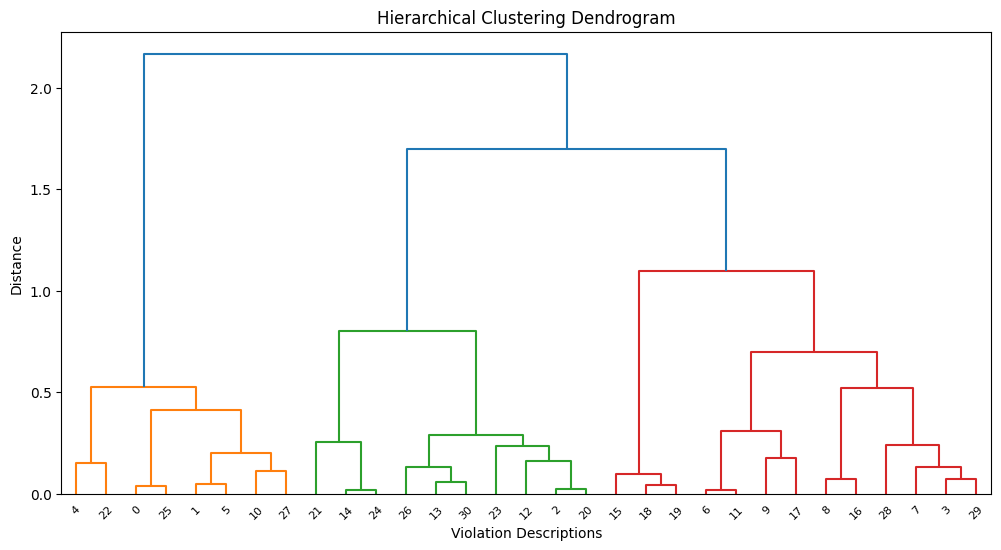


Expected Clusters: 7, Actual Clusters Found: 7
Unique Cluster Labels: [0 1 2 3 4 5 6]

Cluster 0:
- illegal parking property owner
- occupying city property without permit
- overgrown weeds on property
- failure clean sidewalk
- vacant property (ch 111-122)
- board up property (Ch 139-3A)

Cluster 1:
- overfilling of barrel/dumpster
- improper storage trash
- improper storage of trash
- trash illegally dumped in container
- large building recycling
- disposal medical waste

Cluster 2:
- graffiti on building
- failure to maintain dumpster with permit
- site cleanliness license
- transporting refuse without permit

Cluster 3:
- failure to remove snow from sidewalk
- removal snow from private property
- removal snow from non-residential property

Cluster 4:
- illegal vending
- shopping cart
- illegal vending: fruit

Cluster 5:
- unregistered motor vehicles
- no number on a building
- non-emergency auto repair
- posting signs without authority
- failure to register
- fail to post manageme

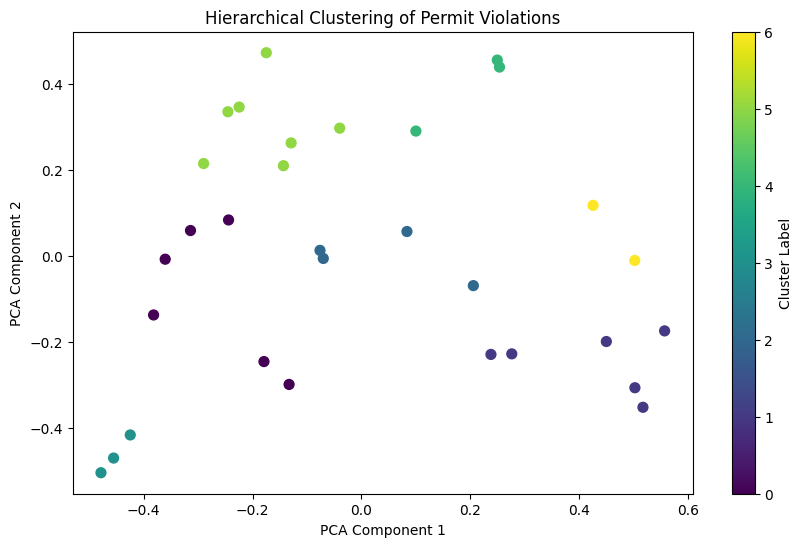

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.feature_extraction.text import TfidfVectorizer
from sentence_transformers import SentenceTransformer

# Remove NaN values
text_data = clustering_data[~pd.isna(clustering_data)]

# Load the violations dataset (Ensure NaN values are removed)
violation_descriptions = text_data
violation_descriptions = np.array([desc for desc in violation_descriptions if isinstance(desc, str)])  # Remove NaNs

# 1. Convert Text to Features using TF-IDF
model = SentenceTransformer('all-MiniLM-L6-v2')

# Convert text to embeddings
embeddings = model.encode(violation_descriptions)

# 2. Apply PCA for 2D visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(embeddings)

# 3. Generate Dendrogram to Determine Clusters
plt.figure(figsize=(12, 6))
dendrogram = sch.dendrogram(sch.linkage(X_pca, method='ward'))
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Violation Descriptions")
plt.ylabel("Distance")
plt.show()

num_clusters = 7  # Modify based on dendrogram
hc = AgglomerativeClustering(n_clusters=num_clusters, linkage='ward')
labels = hc.fit_predict(X_pca)

# Debugging Step: Check Unique Labels
unique_labels = np.unique(labels)
print(f"\nExpected Clusters: {num_clusters}, Actual Clusters Found: {len(unique_labels)}")
print(f"Unique Cluster Labels: {unique_labels}")

# 5. Print Clusters
cluster_dict = {i: [] for i in unique_labels}  # Ensure we only consider actual formed clusters

for i, label in enumerate(labels):
    cluster_dict[label].append(violation_descriptions[i])

for cluster, items in cluster_dict.items():
    print(f"\nCluster {cluster}:")
    for item in items:
        print(f"- {item}")
# 5. Visualize Clusters
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', s=50)
plt.title("Hierarchical Clustering of Permit Violations")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label="Cluster Label")
plt.show()

In [7]:
# Construct a reverse mapping from cluster_dict (description -> cluster number)
description_cluster_map = {}

# Assuming cluster_dict is provided
# Example structure: {0: ["desc1", "desc2"], 1: ["desc3", "desc4"], ...}
for cluster, descriptions in cluster_dict.items():
    for desc in descriptions:
        description_cluster_map[desc] = cluster

# Assign cluster numbers to the dataset based on description matches
data['Cluster'] = data['description'].map(description_cluster_map)

data.head()


,_id,case_no,status_dttm,status,code,value,description,violation_stno,violation_street,violation_city,violation_zip,ward,contact_addr1,sam_id,latitude,longitude,Cluster
0,1,CE825063,2025-03-28 13:11:00,Open,3,100.0,overfilling of barrel/dumpster,3589,Washington,Jamaica Plain,2130.0,11.0,100 GRANDVIEW RD STE #207,144961.0,42.303162,-71.110952,1
1,2,CE825062,2025-03-28 13:08:00,Open,1,25.0,improper storage trash,59,Pleasant,Dorchester,2125.0,13.0,59 PLEASANT ST,355593.0,42.314967,-71.060221,1
2,3,CE825061,2025-03-28 13:03:00,Open,1,25.0,improper storage trash,50,Wenham,Jamaica Plain,2130.0,19.0,52 WENHAM ST,398565.0,42.297070,-71.114531,1
3,4,CE825060,2025-03-28 13:00:00,Open,1,25.0,improper storage trash,48,Wenham,Jamaica Plain,2130.0,19.0,48 WENHAM ST,147686.0,42.296960,-71.114611,1
4,5,CE825059,2025-03-28 12:56:00,Open,1,25.0,improper storage trash,28,Morrill,Dorchester,2125.0,13.0,"685 MAIN STREET, APT 28",97509.0,42.316300,-71.061031,1


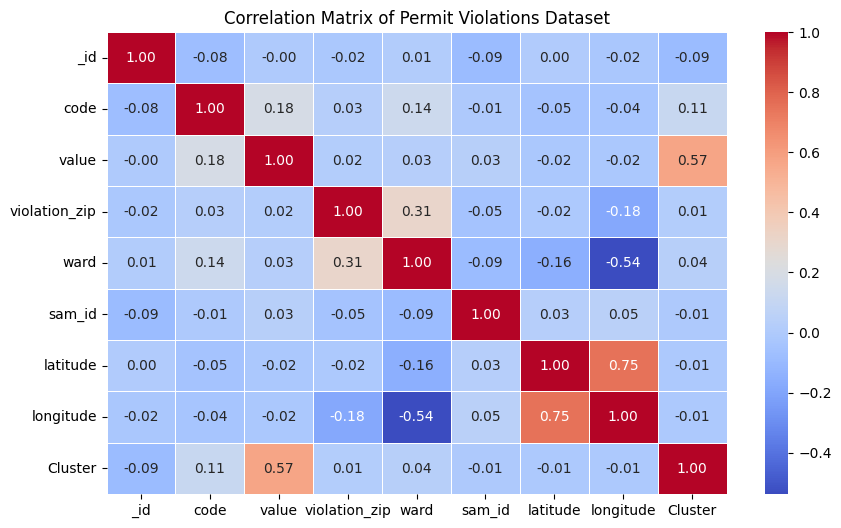

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
correlation_matrix = data.corr(numeric_only=True)

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Permit Violations Dataset")
plt.show()


<ipython-input-9-6297cde14e61>:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', num_clusters)  # Using 'tab10' colormap


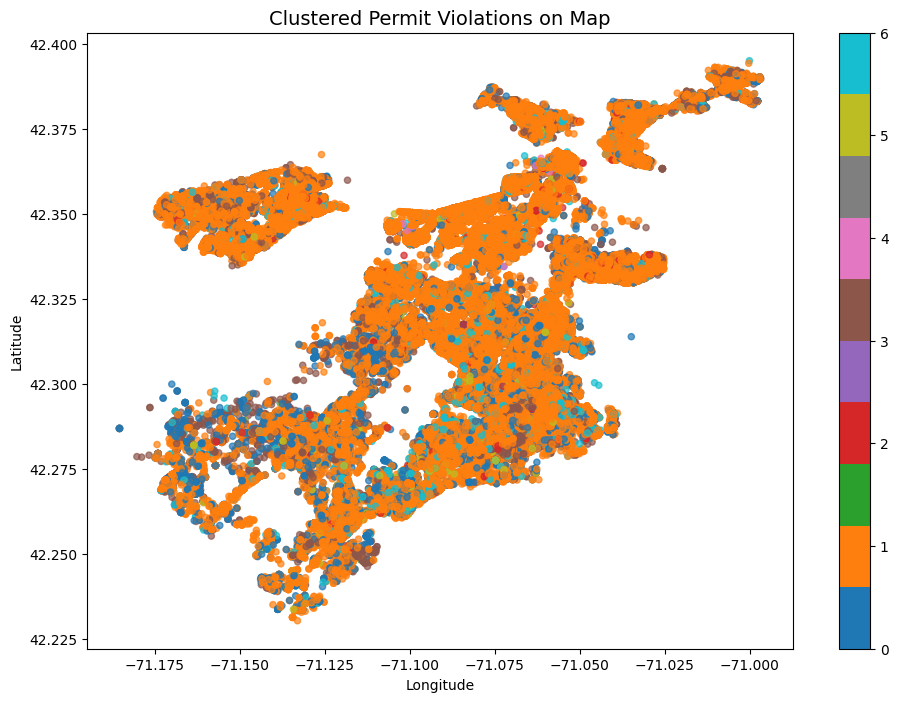

In [9]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np

# Ensure latitude and longitude columns exist and have valid values
data = data.dropna(subset=['latitude', 'longitude'])

#Removing outlier
data = data[~data['latitude'].between(34, 35)]

# Create a GeoDataFrame
gdf = gpd.GeoDataFrame(data, geometry=gpd.points_from_xy(data['longitude'], data['latitude']))

# Define a colormap for clusters
num_clusters = data['Cluster'].nunique()
colors = plt.cm.get_cmap('tab10', num_clusters)  # Using 'tab10' colormap

# Plot the clusters on a map
fig, ax = plt.subplots(figsize=(12, 8))
gdf.plot(ax=ax, column='Cluster', cmap='tab10', legend=True, alpha=0.7, markersize=20)

# Title and labels
ax.set_title("Clustered Permit Violations on Map", fontsize=14)
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

# Show plot
plt.show()


<ipython-input-10-6c1ef9b934bb>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=landlord_violations.head(10), x='Violation Count', y='Landlord/Management Company', palette='viridis')


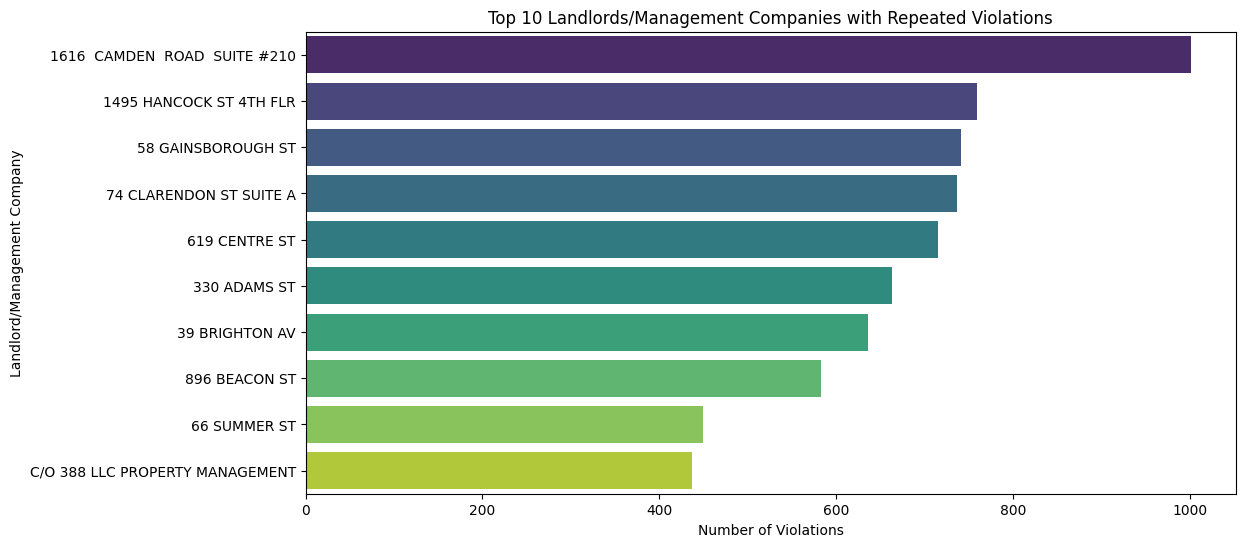

<ipython-input-10-6c1ef9b934bb>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=neighborhood_violations.head(10), x='Violation Count', y='Neighborhood/Community', palette='magma')


No 'build_year' column found in dataset.


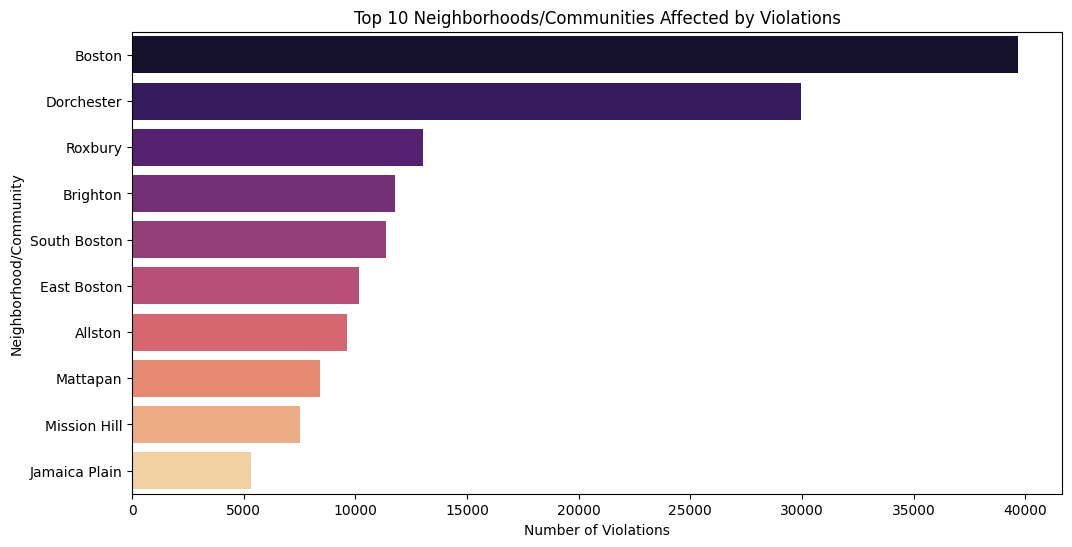

<ipython-input-10-6c1ef9b934bb>:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=complaint_types.head(10), x='Count', y='Complaint Type', palette='coolwarm')


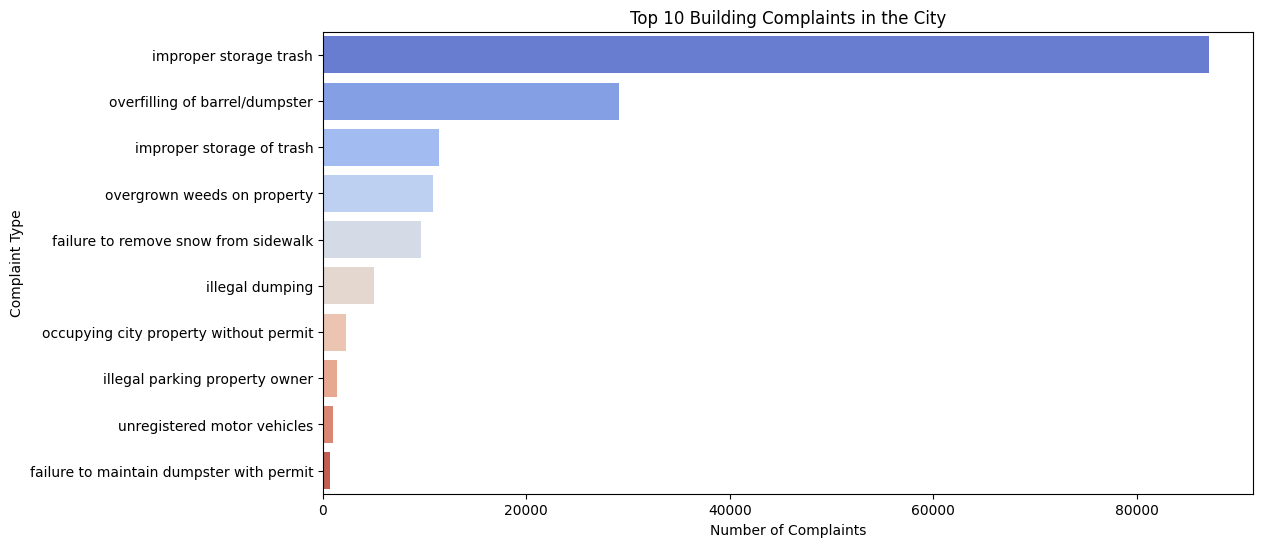

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1) Identify landlords/management companies with repeated violations
landlord_violations = data['contact_addr1'].value_counts().reset_index()
landlord_violations.columns = ['Landlord/Management Company', 'Violation Count']

# Plot landlords with most violations
plt.figure(figsize=(12, 6))
sns.barplot(data=landlord_violations.head(10), x='Violation Count', y='Landlord/Management Company', palette='viridis')
plt.title("Top 10 Landlords/Management Companies with Repeated Violations")
plt.xlabel("Number of Violations")
plt.ylabel("Landlord/Management Company")
plt.show()

# 2) Analyze common features of buildings
if 'build_year' in data.columns:
    plt.figure(figsize=(12, 6))
    sns.histplot(data['build_year'].dropna(), bins=30, kde=True, color='blue')
    plt.title("Distribution of Building Construction Year")
    plt.xlabel("Year Built")
    plt.ylabel("Frequency")
    plt.show()
else:
    print("No 'build_year' column found in dataset.")

# 3) Identify neighborhoods/communities most affected
neighborhood_violations = data['violation_city'].value_counts().reset_index()
neighborhood_violations.columns = ['Neighborhood/Community', 'Violation Count']

plt.figure(figsize=(12, 6))
sns.barplot(data=neighborhood_violations.head(10), x='Violation Count', y='Neighborhood/Community', palette='magma')
plt.title("Top 10 Neighborhoods/Communities Affected by Violations")
plt.xlabel("Number of Violations")
plt.ylabel("Neighborhood/Community")
plt.show()

# 4) Analyze common types of building complaints
complaint_types = data['description'].value_counts().reset_index()
complaint_types.columns = ['Complaint Type', 'Count']

plt.figure(figsize=(12, 6))
sns.barplot(data=complaint_types.head(10), x='Count', y='Complaint Type', palette='coolwarm')
plt.title("Top 10 Building Complaints in the City")
plt.xlabel("Number of Complaints")
plt.ylabel("Complaint Type")
plt.show()

